In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont, ImageFilter

Tarea 1: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

[0.396484375, 0.4296875, 0.3984375, 0.390625, 0.392578125, 0.388671875, 0.4140625] [6, 12, 15, 20, 21, 88, 100]


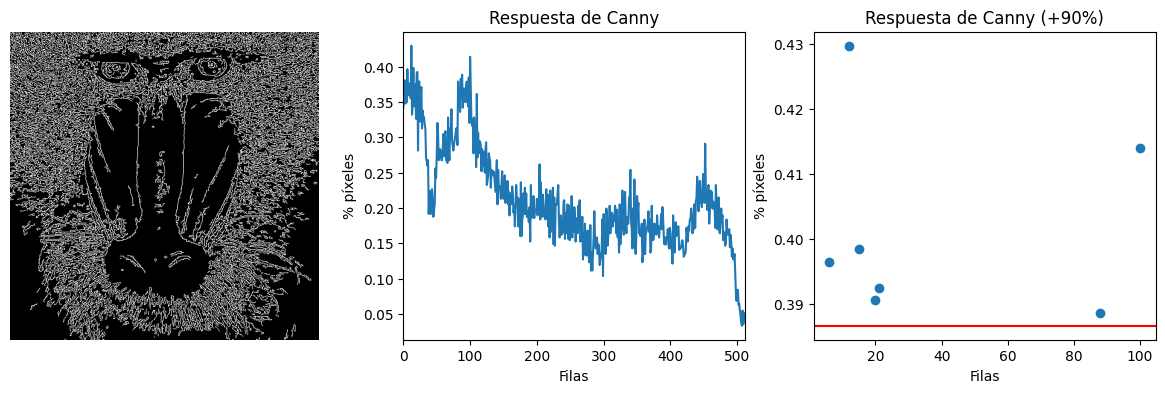

In [2]:
# El contenido de la imagen resultado de Canny, son valores 0 o 255
# Cuenta el número de píxeles blancos (255) por fila
# Suma los valores de los pixeles por fila
# Row
img = cv2.imread('mandril.jpg') 
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Convierte el array de N arrays de 1 elemento en un array de N elementos
row_counts = row_counts.reshape((len(row_counts)))
# rows
rows = row_counts / (255 * canny.shape[0])

# Guardamos en 'maxfil' el valor máximo de blancos en para filas
maxfil = rows.max()
# Creamos un array para guardar las filas cuyo valor de blancos sea mayor que el 90% de 'maxfil'
max_rows_values = []
max_rows_indexes = []
for i in range(len(rows)):
    if rows[i] >= 0.9*maxfil:
        max_rows_values.append(float(rows[i]))
        max_rows_indexes.append(i)
print(max_rows_values, max_rows_indexes)

# Muestra Canny
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(15, 4))
ax1.set_axis_off()
ax2.set_title("Canny")
ax1.imshow(canny, cmap='gray') 

# Muestra píxeles blancos por filas
ax2.set_title("Respuesta de Canny")
ax2.set_xlabel("Filas")
ax2.set_ylabel("% píxeles")
ax2.plot(rows)
# Rango en x definido por las filas
ax2.set_xlim([0, len(row_counts)])

# Muestra valor de píxeles blancos mayores que el 90% de maxfil
ax3.set_title("Respuesta de Canny (+90%)")
ax3.set_xlabel("Filas")
ax3.set_ylabel("% píxeles")
ax3.axhline(maxfil*0.9, color='red')
x = np.array(max_rows_indexes)
y = np.array(max_rows_values)
ax3.plot(x, y, 'o')

Tarea 2: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

[0.349609375] [288]
[0.302734375, 0.291015625, 0.291015625, 0.294921875, 0.296875, 0.314453125, 0.30078125] [3, 4, 20, 51, 81, 82, 83]


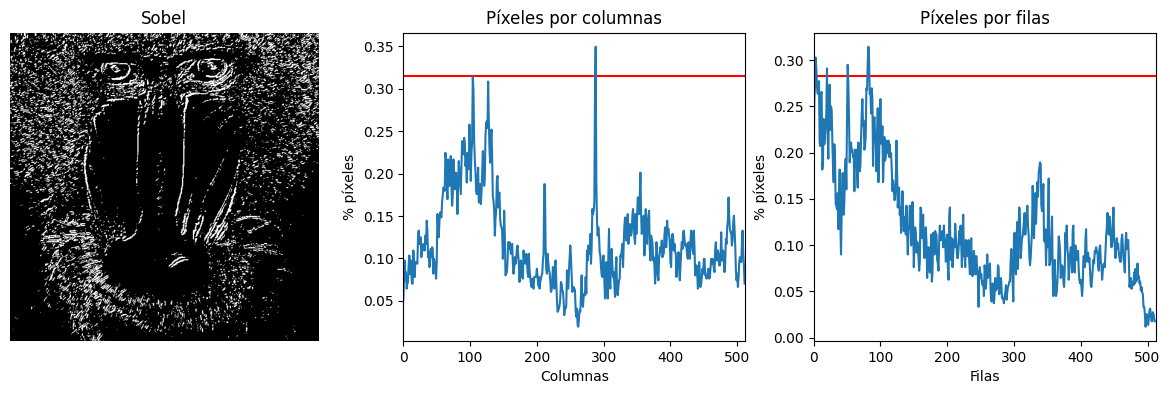

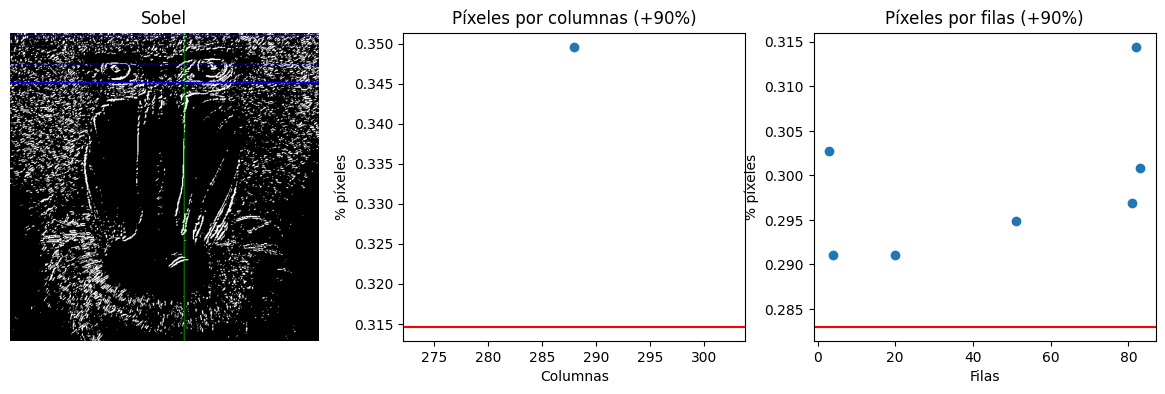

In [12]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
img = cv2.imread('mandril.jpg') 
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

valor_umbral = 130

_, imagenUmbralizada = cv2.threshold(cv2.convertScaleAbs(sobel), valor_umbral, 255, cv2.THRESH_BINARY)

# Mostramos Sobel
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(15, 4))
ax1.set_axis_off()
ax1.set_title("Sobel")
ax1.imshow(imagenUmbralizada, cmap='gray')

col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts / (255 * imagenUmbralizada.shape[1])
cols = cols[0]

row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = row_counts.reshape((len(row_counts)))
rows = row_counts / (255 * imagenUmbralizada.shape[0])

maxcol = cols.max()
maxfil = rows.max()

# Mostramos la cuenta de píxeles para las columnas
ax2.set_title("Píxeles por columnas")
ax2.set_xlabel("Columnas")
ax2.set_ylabel("% píxeles")
ax2.axhline(maxcol*0.9, color="red")
ax2.plot(cols)
# Rango en x definido por las columnas
ax2.set_xlim([0, len(cols)])

# Mostramos la cuenta de píxeles para las filas
ax3.set_title("Píxeles por filas")
ax3.set_xlabel("Filas")
ax3.set_ylabel("% píxeles")
ax3.axhline(maxfil*0.9, color="red")
ax3.plot(rows)
ax3.set_xlim([0, len(rows)])

# Creamos un array para guardar las filas cuyo valor de blancos sea mayor que el 90% de 'maxfil'
max_cols_values = []
max_cols_indexes = []
for i in range(len(cols)):
    if cols[i] >= 0.9*maxcol:
        max_cols_values.append(float(cols[i]))
        max_cols_indexes.append(i)

max_rows_values = []
max_rows_indexes = []
for i in range(len(rows)):
    if rows[i] >= 0.9*maxfil:
        max_rows_values.append(float(rows[i]))
        max_rows_indexes.append(i)

print(max_cols_values, max_cols_indexes)
print(max_rows_values, max_rows_indexes)

# Mostramos los gráficos para la cuenta por encima del 90%
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(15, 4))
sobel90 = cv2.cvtColor(imagenUmbralizada, cv2.COLOR_GRAY2BGR)
for col_index in max_cols_indexes:
    pt1 = [col_index, 0]
    pt2 = [col_index, sobel90.shape[0]]
    cv2.line(sobel90, pt1, pt2, (0, 255, 0), 1)
for row_index in max_rows_indexes:
    pt1 = [0, row_index]
    pt2 = [sobel90.shape[1], row_index]
    cv2.line(sobel90, pt1, pt2, (0, 0, 255), 1)


ax1.set_axis_off()
ax1.set_title("Sobel")
ax1.imshow(sobel90)

# Columnas
ax2.set_title("Píxeles por columnas (+90%)")
ax2.set_xlabel("Columnas")
ax2.set_ylabel("% píxeles")
ax2.axhline(maxcol*0.9, color='red')
x = np.array(max_cols_indexes)
y = np.array(max_cols_values)
ax2.plot(x, y, 'o')

# Filas
ax3.set_title("Píxeles por filas (+90%)")
ax3.set_xlabel("Filas")
ax3.set_ylabel("% píxeles")
ax3.axhline(maxfil*0.9, color='red')
x = np.array(max_rows_indexes)
y = np.array(max_rows_values)
ax3.plot(x, y, 'o')



Tarea 3: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura. Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.

In [4]:
import cv2

vid = cv2.VideoCapture(0)
modo = 0

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if not ret:
        break
    
    # Convertir a escala de grises
    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if modo == 0:
        # Normal
        salida = frame.copy()
    
    elif modo == 1:
        # Umbralización
        _, salida = cv2.threshold(gris, 130, 255, cv2.THRESH_BINARY)
    
    elif modo == 2:
        # Sobel
        ggris = cv2.GaussianBlur(gris, (3, 3), 0)
        sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)
        sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)
        sobel = cv2.convertScaleAbs(cv2.add(sobelx, sobely))
        salida = sobel
    
    elif modo == 3:
        # Pop art
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        frame[:,:,0] = b
        frame[:,:,1] = 255 - r
        frame[:,:,2] = 255 - g

        salida = frame 

    
    # Mostrar la ventana
    cv2.imshow("Resultado", salida)

    key = cv2.waitKey(20)
    # Detenemos pulsando ESC
    if key == 27:
        break
    # Cambiamos entre modos, si pulsa d avanzo a la derecha
    # Si pulso a retrocedo
    elif key == ord('d'):
        modo = (modo + 1) % 4 
    elif key == ord('a'):
        modo = (modo - 1) % 4

# Liberar el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


Tarea 4: Tras ver los vídeos My little piece of privacy, Messa di voce y Virtual air guitar proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [10]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

video_capture = cv2.VideoCapture(0)

back_sub = cv2.createBackgroundSubtractorMOG2(detectShadows=True)

def detectar_caras(vid, fg_mask):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)
    for (x, y, w, h) in faces:
        # Extraemos parte de la región de la cara detectada de fg_mask
        x0 = max(0, x + w//4)
        y0 = max(0, y + h//4)
        x1 = min(fg_mask.shape[1], x + 3*w//4)
        y1 = min(fg_mask.shape[0], y + 3*h//4)
        face_region = fg_mask[y0:y1, x0:x1]
        # Sacamos el ratio de píxeles de la cara que pertenecerían al fondo
        background_ratio = np.sum(face_region == 0) / face_region.size
        if face_region.size > 0 and background_ratio > 0.87:
            print(background_ratio)
            # Sacamos la región donde está la cara detectada
            roi = vid.copy()

            # Aplicamos Gaussian Blur
            blurred_roi = cv2.GaussianBlur(vid, (51, 51), 30)

            # Creamos elipse blanca sobre fondo negro para la máscara
            mask = np.zeros((vid.shape[0], vid.shape[1]), dtype=np.uint8)
            center = (x + (w//2), y + (h//2))
            cv2.ellipse(mask, center, (w//2, h//2), 0, 0, 360, 255, -1)

            # Hacemos máscara de 3 canales (de grises a color)
            mask3ch = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
            mask_normalized = mask3ch.astype(float) / 255

            # Reemplazamos la región original por la nueva
            vid[:] = (1 - mask_normalized) * vid + mask_normalized * blurred_roi

    return faces

frame_count = 0
while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    # Sacamos el fondo y nos quedamos con la 'Foreground mask'
    fg_mask = back_sub.apply(frame)
    if frame_count > 30:  # Wait for background model to learn
        faces = detectar_caras(frame, fg_mask)
    
    frame_count += 1
    
    # Le pasamos la máscara al detector de caras para saber si la cara está en el fondo o no
    # faces = detectar_caras(frame, fg_mask)
    cv2.imshow('Video', frame)
    if cv2.waitKey(20) == 27:
        break

# Liberar el objeto de captura
video_capture.release()
# Destruye ventanas
cv2.destroyAllWindows()

0.9219835069444444
0.9045189504373178
0.8737379105112126
0.8705296514259846
0.877999094612947
0.8936170212765957
0.9028972385694884
0.9097222222222222
0.9157986111111112
0.9228515625
0.9284673052894628
0.9419704538208099
0.9433521096822192
0.9159071180555556
0.8765278406518787
0.8846571180555556
0.8918062471706655
0.937867813490267
0.9601629696695337
0.9637586805555556
0.9709695290858725
0.9694431869624265
0.9714127423822715
0.9698350694444444
0.9656607700312175
0.9623480902777778
0.8796077504725898
0.8757088846880907
0.9010290206960342
0.9286389413988658
0.9411498415572658
0.9572204879176783
0.9506301306509423
0.9269848771266541
0.9217283950617284
0.930285196921684
0.9337495664238641
0.8884110457220462
0.8782254413761883
0.8799621928166351
0.8794831542084289
0.8804347826086957
0.8818525519848771
0.9071978270710729
0.9110243055555556
0.9135355364418288
0.9090086011770032
0.9012287334593573
0.9203259393390675
0.9198732458125849
0.8972385694884563
0.8963331824354912
0.898596650067904
0.9